In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
datasenti = pd.read_csv(r"data/tweets_labelled_tokenized.csv")
datasenti.head()

,tweet,polaritas,sentimen
0,"['jbharga', 'ayam', 'rm', 'tgk', 'telor', 'wya...",-2,Negatif
1,"['berdiri', 'di', 'atas', 'kaki', 'sendiri', '...",-2,Negatif
2,"['penyebab', 'harga', 'telur', 'anjlok', 'vers...",-1,Negatif
3,"['turunnya', 'permintaan', 'masyarakat', 'telu...",-1,Negatif
4,"['peternak', 'ayam', 'petelur', 'mengaku', 'me...",1,Positif


In [3]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(datasenti['tweet'], datasenti['sentimen'], test_size = 0.1, random_state = 42)

In [4]:
data_train = pd.DataFrame()
data_train['tweet'] = train_X
data_train['sentimen'] = train_Y

data_test = pd.DataFrame()
data_test['tweet'] = test_X
data_test['sentimen'] = test_Y

In [5]:
data_train.to_csv(r"df_trainsvm.csv")
data_test.to_csv(r"df_testsvm.csv")

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

datatfidf = TfidfVectorizer(max_features = 5000)
datatfidf.fit(datasenti['tweet'].values.astype('U'))
train_X_datatfidf = datatfidf.transform(data_train['tweet'].values.astype('U'))
test_X_datatfidf = datatfidf.transform(data_test['tweet'].values.astype('U'))

In [7]:
datatfidf

TfidfVectorizer(max_features=5000)

In [8]:
print(test_X_datatfidf)

  (0, 4382)	0.07974587443110454
  (0, 3621)	0.29069884833471427
  (0, 2975)	0.49436403924273015
  (0, 2905)	0.4442528644445051
  (0, 2122)	0.4693084518436177
  (0, 2018)	0.30549743695446296
  (0, 1436)	0.284705242106001
  (0, 1248)	0.06240336201568706
  (0, 161)	0.2623890294838127
  (1, 4750)	0.45611879089103297
  (1, 4666)	0.41797140698819535
  (1, 4382)	0.07102257631741818
  (1, 4086)	0.47843357997480673
  (1, 4075)	0.44028619607196917
  (1, 3734)	0.21314918358678203
  (1, 1959)	0.375418869340408
  (1, 1248)	0.05557713891583974
  (2, 4382)	0.10448490442633843
  (2, 3734)	0.31357454531194023
  (2, 3703)	0.36281362999352007
  (2, 1811)	0.3912645013602243
  (2, 1248)	0.08176234021641225
  (2, 706)	0.42198981536049435
  (2, 479)	0.5658231939508186
  (2, 161)	0.17189411279088374
  :	:
  (437, 3734)	0.13942076055618902
  (437, 3690)	0.2983470434176258
  (437, 3213)	0.22662276609291235
  (437, 3016)	0.23005377907861294
  (437, 2597)	0.3129431343496092
  (437, 2474)	0.2630387698339728
  (437

In [9]:
print(train_X_datatfidf)

  (0, 4803)	0.3598161635325953
  (0, 4673)	0.33424949109358865
  (0, 4626)	0.17274689689836326
  (0, 4379)	0.12166124112000182
  (0, 4337)	0.4004029826824378
  (0, 3827)	0.345417760299169
  (0, 1681)	0.38923471347685745
  (0, 1248)	0.10108539576935047
  (0, 974)	0.4148013859158642
  (0, 619)	0.3174091544732485
  (1, 4379)	0.09218034457494102
  (1, 4004)	0.31428690297654005
  (1, 3828)	0.31428690297654005
  (1, 3734)	0.14686962720961794
  (1, 3535)	0.2650159038879987
  (1, 3531)	0.31428690297654005
  (1, 3019)	0.2532543066251865
  (1, 2440)	0.14146339568464203
  (1, 2406)	0.13457156049928795
  (1, 2018)	0.18747531308574544
  (1, 1688)	0.22572555279026893
  (1, 1652)	0.24634036611465968
  (1, 1428)	0.409358275559326
  (1, 1248)	0.03829521434982741
  (1, 1025)	0.1994402442633853
  :	:
  (3943, 681)	0.37509184041514954
  (3943, 381)	0.44800702870034464
  (3943, 107)	0.3158788231691944
  (3943, 45)	0.3772786219341547
  (3944, 4382)	0.16495054000285883
  (3944, 4231)	0.6661962156312571
  (39

In [10]:
print(test_X_datatfidf.shape)
print(train_X_datatfidf.shape)

(439, 5000)
(3947, 5000)


In [11]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X_datatfidf,train_Y)

SVC(kernel='linear')

In [12]:
from sklearn.metrics import accuracy_score

predictionsSVM = model.predict(test_X_datatfidf)
test_prediction = pd.DataFrame()
test_prediction['tweet'] = test_X
test_prediction['sentimen'] = predictionsSVM
SVMaccuracy = accuracy_score(predictionsSVM, test_Y)*100
SVMaccuracy= round(SVMaccuracy,1)

In [13]:
test_prediction

,tweet,sentimen
2776,"['pantau', 'harga', 'ayam', 'je', 'telur', 'ay...",Positif
3022,"['miniso', 'sikat', 'wajah', 'unik', 'berbentu...",Positif
2606,"['harga', 'telur', 'ayam', 'daerah', 'anjlok',...",Negatif
912,"['ayo', 'makan', 'telor', 'selagi', 'harga', '...",Positif
877,"['kemarin', 'daerah', 'rumahku', 'geger', 'tel...",Positif
...,...,...
2090,"['nobody', 'demo', 'pasal', 'harga', 'ayam', '...",Negatif
2547,"['ditangkap', 'jeritan', 'peternak', 'ayam', '...",Negatif
1454,"['strategi', 'kementan', 'stabilisasi', 'harga...",Positif
1564,"['nx', 'resmi', 'pecah', 'telur', 'all', 'new'...",Positif


In [14]:
SVMaccuracy

88.4

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Support Vector Machine Acuracy:", accuracy_score(test_Y, predictionsSVM)*100)
print("Support Vector Machine Precision:", precision_score(test_Y, predictionsSVM, average="binary", pos_label="Negatif")*100)
print("Support Vector Machine Recall:", recall_score(test_Y, predictionsSVM, average="binary", pos_label="Negatif")*100)
print("Support Vector Machine f1_score:", f1_score(test_Y, predictionsSVM, average="binary", pos_label="Negatif")*100)
print('====================================================\n')
print (classification_report(test_Y, predictionsSVM))

Support Vector Machine Acuracy: 88.38268792710706
Support Vector Machine Precision: 84.90566037735849
Support Vector Machine Recall: 51.13636363636363
Support Vector Machine f1_score: 63.829787234042556

              precision    recall  f1-score   support

     Negatif       0.85      0.51      0.64        88
     Positif       0.89      0.98      0.93       351

    accuracy                           0.88       439
   macro avg       0.87      0.74      0.78       439
weighted avg       0.88      0.88      0.87       439



Support Vector Machine Acuracy: 88.4


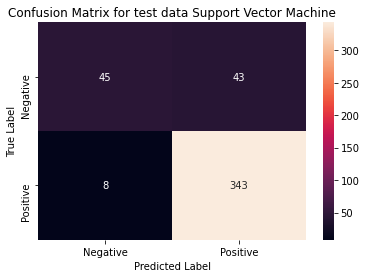

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Support Vector Machine Acuracy:", SVMaccuracy)

conf_mat = confusion_matrix(test_Y, predictionsSVM)
class_label = ["Negative","Positive"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()